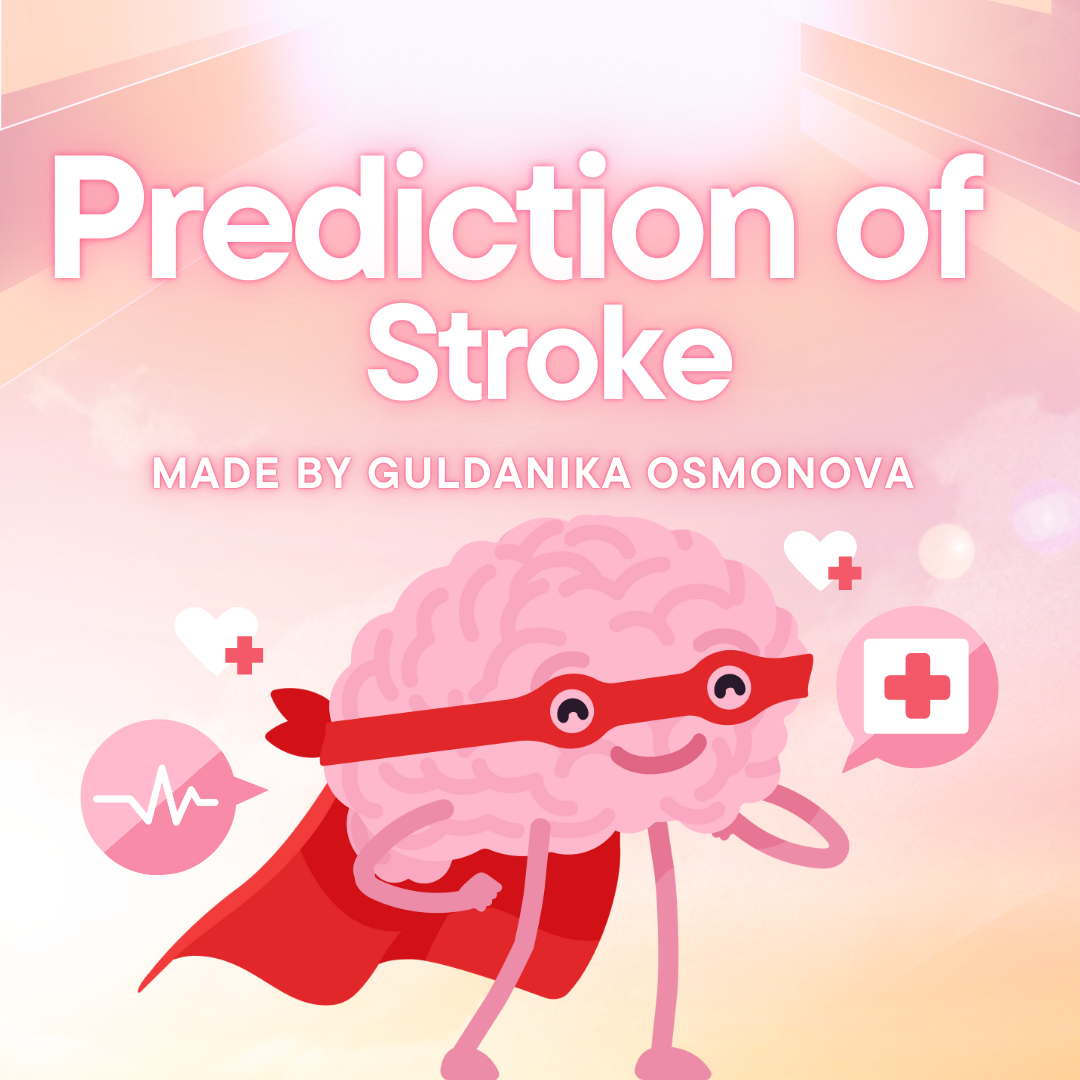

#**INTRODUCTION**

### Why Stroke Prediction is Crucial

Stroke is one of the leading causes of death and disability worldwide, affecting millions of people annually. Its consequences can be devastating, ranging from long-term physical and cognitive impairments to life-threatening complications. However, strokes are often preventable if detected early, making prediction an essential tool in modern healthcare.

By identifying individuals at high risk for stroke, medical professionals can intervene with timely preventive measures, such as lifestyle modifications, medication, or closer monitoring. Predictive models can leverage key risk factors, such as age, blood pressure, diabetes, heart conditions, and lifestyle habits, to assess an individual’s likelihood of experiencing a stroke. This enables proactive care, reducing the healthcare burden and potentially saving lives.

Moreover, in resource-limited settings, predictive tools offer a cost-effective way to prioritize care and allocate medical resources efficiently. Early prediction empowers patients and clinicians to act before a stroke occurs, emphasizing prevention over treatment and significantly improving health outcomes.

#**ABOUT THE DATASET**

Attribute Information
* 1) id: unique identifier
*2) gender: "Male", "Female" or "Other"
*3) age: age of the patient
*4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*6) ever_married: "No" or "Yes"
*7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*8) Residence_type: "Rural" or "Urban"
*9) avg_glucose_level: average glucose level in blood
*10) bmi: body mass index
*11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*12) stroke: 1 if the patient had a stroke or 0 if not

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**







#**AIM OF THIS PROJECT:**

### Purpose of the Machine Learning Project

The purpose of this machine learning project is to develop a predictive model to assess the likelihood of a stroke in individuals based on relevant patient data. According to the World Health Organization (WHO), stroke is the second leading cause of death globally, accounting for approximately 11% of total deaths. This alarming statistic highlights the critical need for effective stroke prevention strategies.

Using a dataset containing information such as gender, age, pre-existing medical conditions, and smoking status, this project aims to harness the power of machine learning to predict stroke risk. Each row in the dataset represents a patient's profile, offering detailed input parameters that the model will analyze to determine stroke likelihood.

**The ultimate goal is to create a reliable tool for early stroke prediction, enabling healthcare professionals to identify at-risk individuals and take timely preventive measures. By leveraging data-driven insights, this project aspires to contribute to reducing the global burden of stroke and improving patient outcomes.**


#This dataset was downloaded from the Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 67.4k/67.4k [00:00<00:00, 19.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/stroke-prediction-dataset/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#**EDA**

primary goal at this stage is to understand the dataset, uncover patterns, detect anomalies, and identify relationships between variables. Here's what we will do at EDA:

1. Understand the Dataset Structure
(e.g., number of rows and columns, data types, etc.).
Check for unique identifiers, column names, and descriptions of the features.
2. Check for Missing Values
Identify missing data in the dataset and decide how to handle them (e.g., imputation or removal).
3. Summary Statistics
Compute summary statistics for numerical features (mean, median, standard deviation, etc.).
Analyze categorical features for frequency distribution.
4. Data Visualization
Use plots to explore distributions and relationships:
Histograms and boxplots for continuous variables.
Bar plots and pie charts for categorical data.
Scatter plots or pair plots for relationships between numerical variables.
Visualize potential outliers or skewness in the data.
5. Identify Correlations
Compute the correlation matrix for numerical features to find linear relationships.
Use heatmaps to visualize correlations and detect multicollinearity.
6. Analyze Target Variable
Explore the distribution of the target variable (e.g., stroke occurrence in this case).
Check for class imbalances in classification problems.
7. Feature Relationships
Analyze how input variables relate to the target variable:
Compare distributions of features across target categories.
Look for trends or patterns using grouped visualizations.
8. Outliers and Anomalies
Identify outliers in numerical data using methods like boxplots or z-scores.
Decide whether to handle or retain them, depending on their context.
9. Assess Feature Importance
Perform initial feature selection based on domain knowledge and statistical tests.
Check for redundant or irrelevant features.
10. Form Hypotheses
Generate hypotheses about potential predictors or patterns based on EDA findings.
Use these hypotheses to guide feature engineering and model selection.

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
unique_genders = df['gender'].unique()
unique_genders


array([1, 0, 2])

In [ ]:
df['gender'].value_counts()

,count
gender,
0,2994
1,2115
2,1


In [ ]:
df = df[df['gender'] != 2]

In [ ]:
df['gender'].unique()

array([1, 0])

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Stats for categorical data

#The round(..., 2) rounds the numerical parts of the output (e.g., freq) to two decimal places,
# making the results easier to read

round (df.describe(exclude = ['float', 'int64']),2)


,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
# stats of numerical data
round (df.describe(exclude = 'object'),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


#2.Checking for the missing values

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


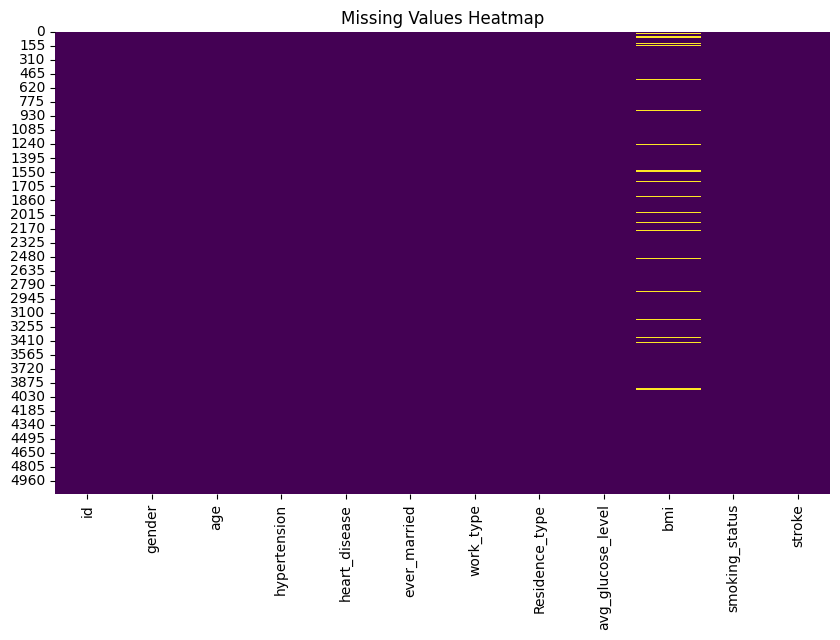

In [ ]:
#Highlight where missing values exist across the dataset.
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

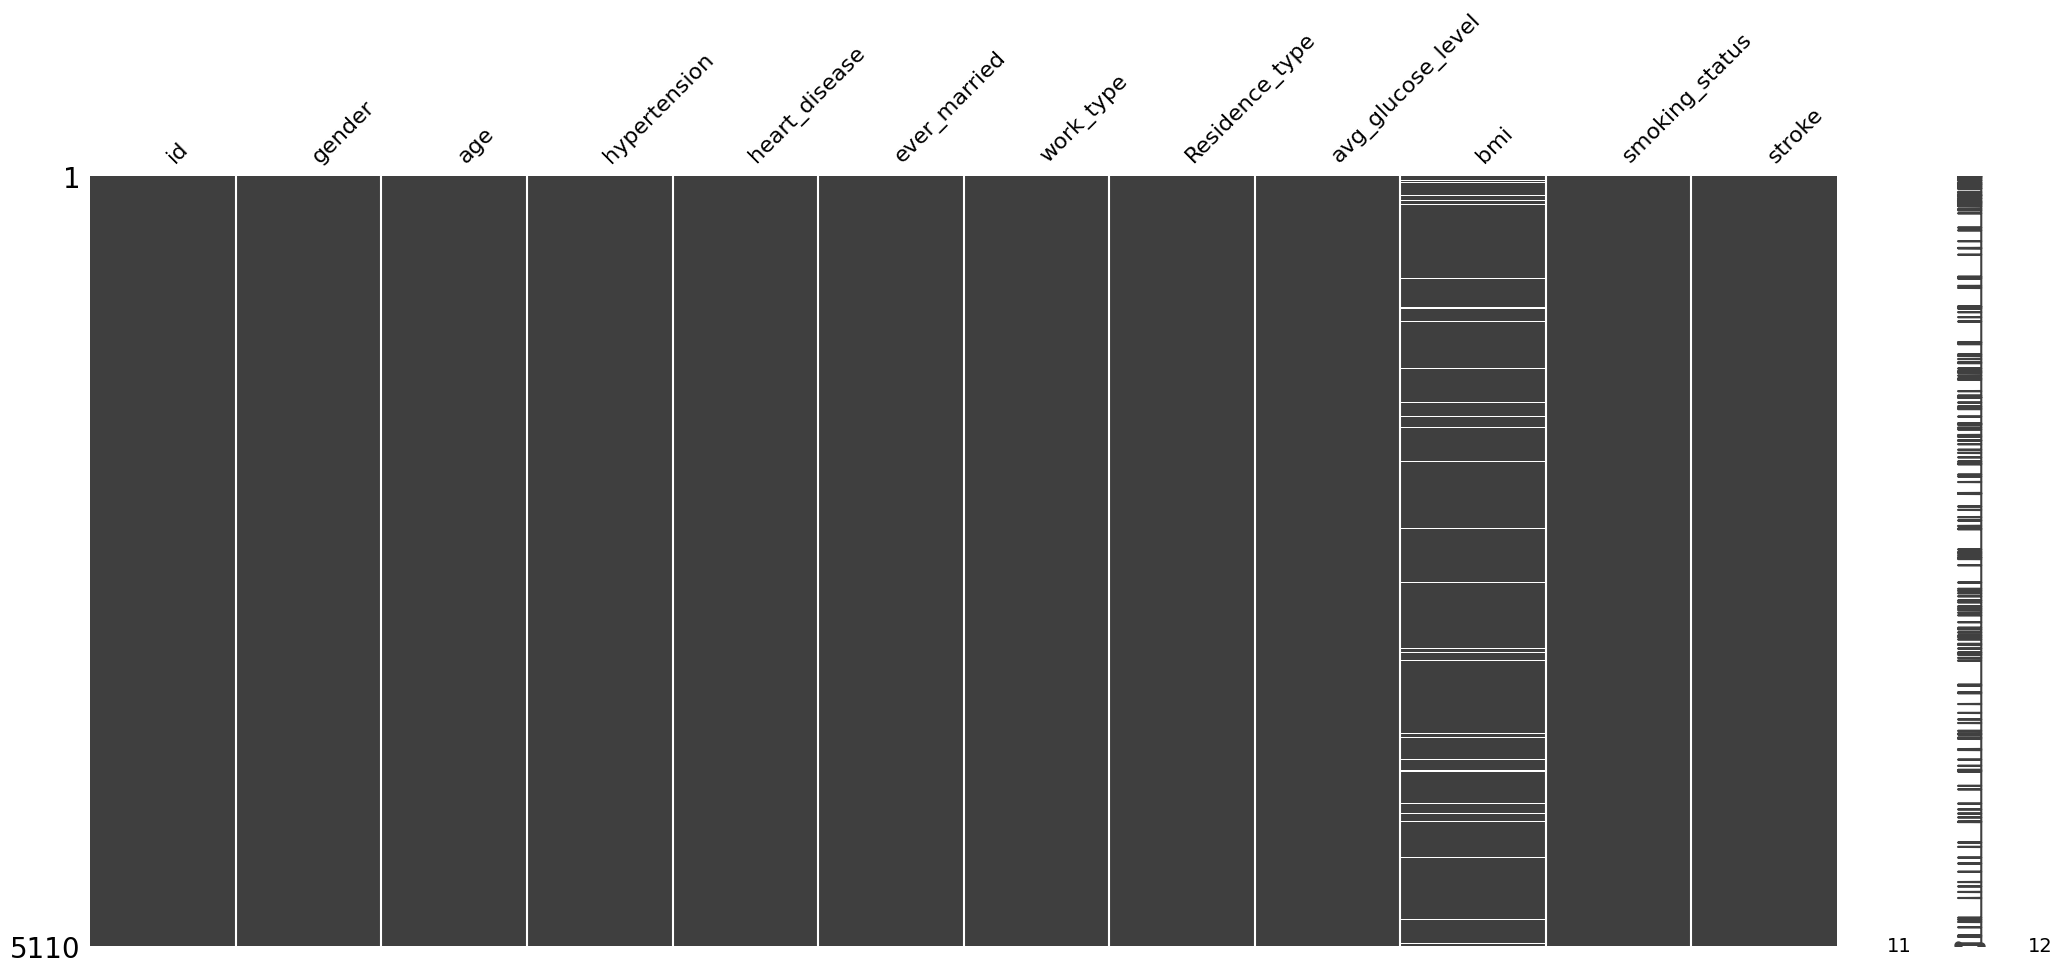

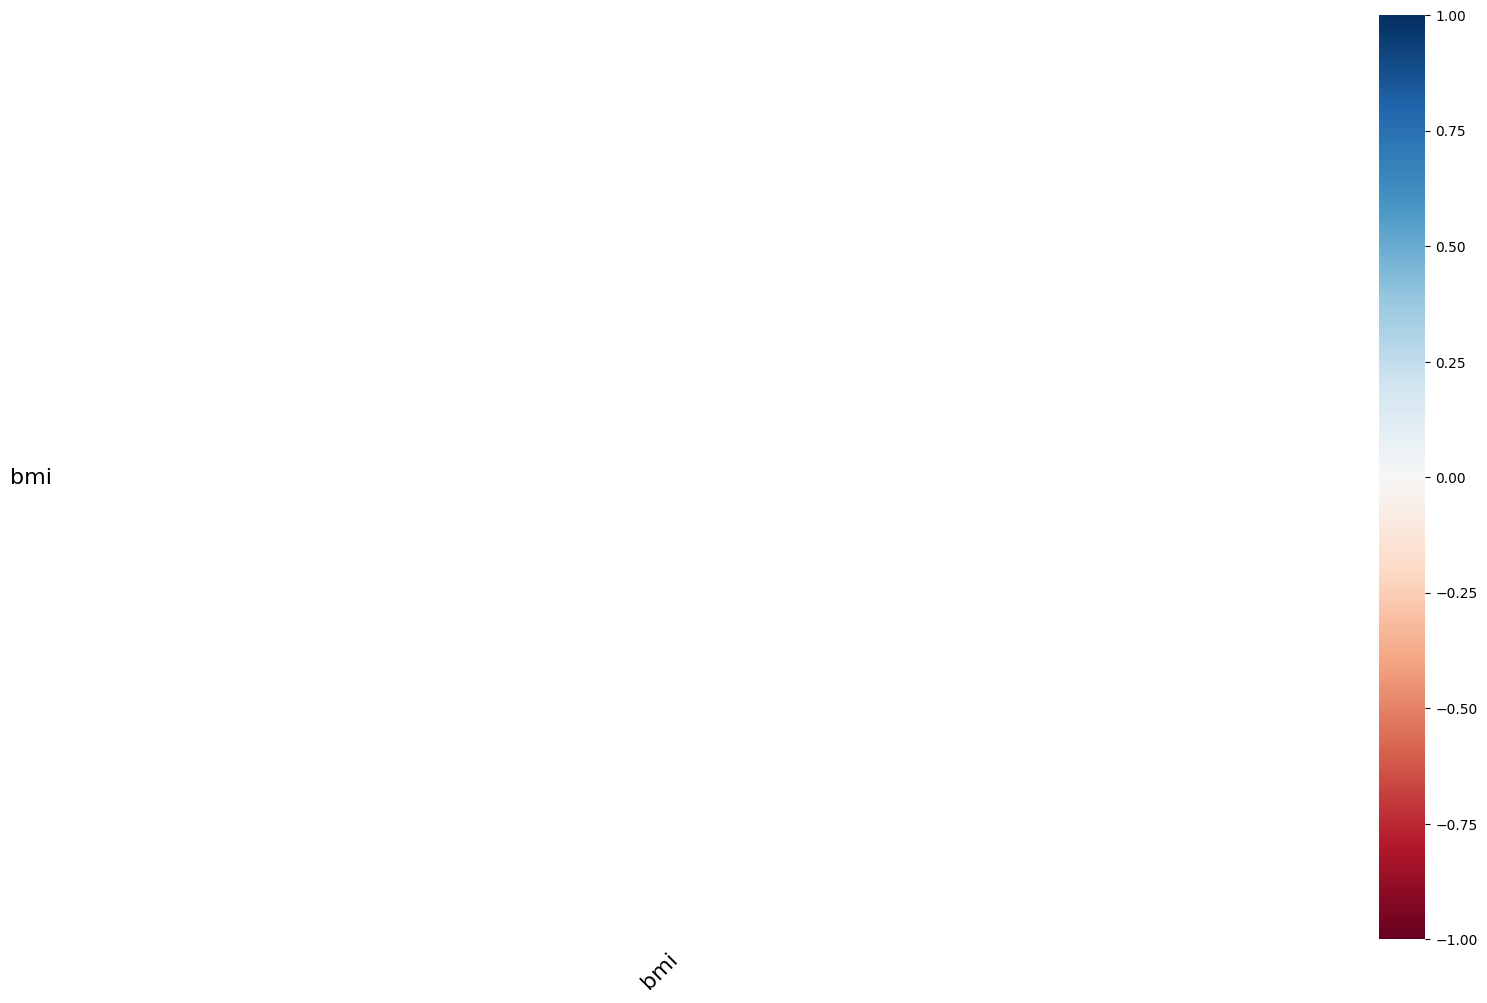

In [ ]:
import missingno as msno

# Visualize missing data as a matrix
msno.matrix(df)
plt.show()

# Visualize missing data as a heatmap (correlation of missingness)
msno.heatmap(df)
plt.show()


#**HANDLING THE MISSING VALUES**

 In our case we use the Median for Imputation.
 Here are the reasons why:

* Resistant to Outliers:

 Unlike the mean, the median is
unaffected by extreme values, making it more reliable for skewed data.

* Preserves Distribution:

It maintains the central tendency of the column without introducing bias from outliers.

* Default Choice for Continuous Variables:

Median imputation is a common practice for numerical features when no other contextual information is available.


In [ ]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


#BMI COLUMN EXPLORING

In [ ]:
# Display basic statistics for the 'bmi' column
print(df['bmi'].describe())  # Provides mean, min, max, quartiles, etc.

# Check for missing values in the 'bmi' column
missing_bmi = df['bmi'].isnull().sum()
print(f"Number of missing values in 'bmi': {missing_bmi}")


count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64
Number of missing values in 'bmi': 0


#Detect Outliers Using the IQR Method

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier bounds for 'bmi': lower={lower_bound:.2f}, upper={upper_bound:.2f}")

# Find the rows in the dataset where 'bmi' is an outlier
outliers_bmi = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]
print("Outliers in 'bmi':\n", outliers_bmi)


Outlier bounds for 'bmi': lower=10.30, upper=46.30
Outliers in 'bmi':
          id  gender   age  hypertension  heart_disease ever_married  \
21    13861  Female  52.0             1              0          Yes   
66    17004  Female  70.0             0              0          Yes   
113   41069  Female  45.0             0              0          Yes   
254   32257  Female  47.0             0              0          Yes   
258   28674  Female  74.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4906  72696  Female  53.0             0              0          Yes   
4952  16245    Male  51.0             1              0          Yes   
5009  40732  Female  50.0             0              0          Yes   
5057  38349  Female  49.0             0              0          Yes   
5103  22127  Female  18.0             0              0           No   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status

###HANDLING OUTLIERS

Here we see that the values of bmi in the dataset varies.
'bmi': lower=9.10, upper=47.50. we should use our domain knowledge to decide what to with such outliers.


Overly High BMI and Stroke Risk: Key Thresholds
Mild Obesity (BMI 30–35): Associated with a moderate increase in stroke risk, often mediated by associated conditions like hypertension.

Severe Obesity (BMI > 35): Stronger correlation with stroke, particularly ischemic stroke, due to compounded risk factors (e.g., severe hypertension, metabolic syndrome).

Extremely High BMI (> 40): Rare but associated with extreme cases of metabolic and vascular dysfunction. These values might still be valid in dataset and could represent important cases of individuals at very high risk for stroke.



# Explore how high BMI interacts with other risk factors (e.g., hypertension, glucose levels)

In [ ]:
# Example: Interaction between BMI and Hypertension
df['bmi_hypertension'] = df['bmi'] * df['hypertension']


# BMI and Glucose Level: High BMI with elevated glucose increases stroke risk.


In [ ]:
# Interaction between BMI and Glucose Level
df['bmi_glucose'] = df['bmi'] * df['avg_glucose_level']


# Interaction between BMI and Smoking Status (convert smoking_status to numeric first if not already)


In [ ]:
# Interaction between BMI and Smoking Status (convert smoking_status to numeric first if not already)
df['smoking_status_numeric'] = df['smoking_status'].map({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3})
df['bmi_smoking'] = df['bmi'] * df['smoking_status_numeric']


In [ ]:
df[['bmi_hypertension', 'bmi_glucose', 'bmi_smoking']].head()

,bmi_hypertension,bmi_glucose,bmi_smoking
0,0.0,8370.054,36.6
1,0.0,5682.101,0.0
2,0.0,3442.400,0.0
3,0.0,5890.312,68.8
4,24.0,4178.880,0.0


The zeros in the interaction terms are likely meaningful (e.g., no hypertension or no smoking means no interaction with BMI for those individuals). You should keep these values in your model.

# Visualize Interaction Term Distributions: Let's visualize the distribution of the interaction terms to understand if there are any extreme values or patterns that we should handle differently:

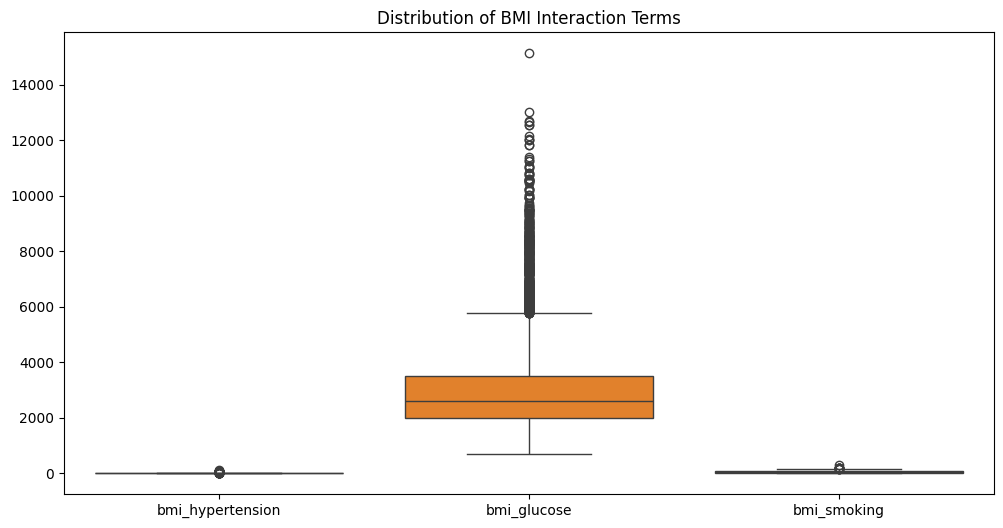

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the interaction terms
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['bmi_hypertension', 'bmi_glucose', 'bmi_smoking']])
plt.title("Distribution of BMI Interaction Terms")
plt.show()


# Analyze the Distribution of BMI and Glucose Levels


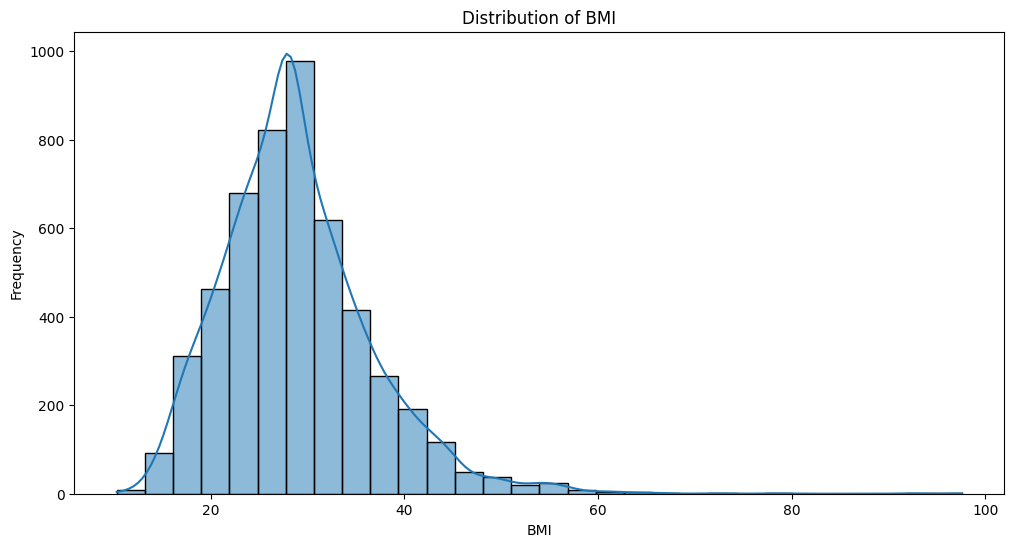

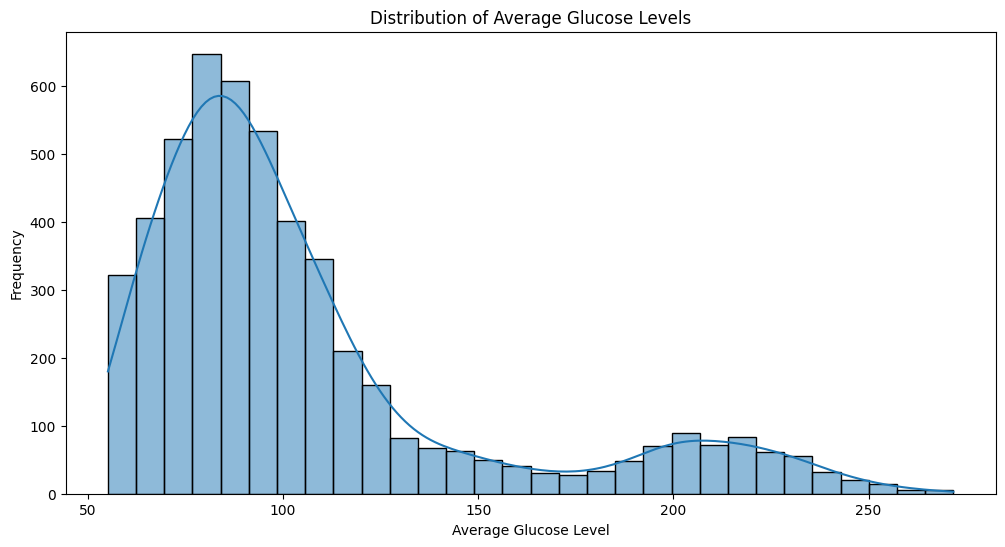

In [ ]:
# Visualizing the distributions of BMI and Glucose Levels
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of BMI
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Glucose Levels
plt.figure(figsize=(12, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Distribution of Average Glucose Levels')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()


# Inspecting Extreme Values

check the extreme values for both bmi and avg_glucose_level to see if there are values that might be considered outliers or erroneous.

If BMI > 50 or Glucose > 200 occurs frequently in the dataset, it could indicate that these values are not typical or could be erroneous.
You should also check for negative or zero values, which are likely to be invalid.


In [ ]:
# Check the highest and lowest values for BMI
bmi_outliers = df[df['bmi'] > 50]  # BMI > 50 could be an extreme value
print("Extreme BMI values:")
print(bmi_outliers[['id', 'bmi']].head())

# Check the highest and lowest values for Glucose Levels
glucose_outliers = df[df['avg_glucose_level'] > 200]  # Glucose > 200 could be an extreme value
print("Extreme Glucose values:")
print(glucose_outliers[['id', 'avg_glucose_level']].head())


Extreme BMI values:
        id   bmi
113  41069  56.6
254  32257  50.1
258  28674  54.6
270  72911  60.9
333   1703  54.7
Extreme Glucose values:
       id  avg_glucose_level
0    9046             228.69
1   51676             202.21
13   8213             219.84
14   5317             214.09
17  34120             221.29


high BMI is valid because it indicated the obersity.

Extreme BMI Values

*   The BMI values you mentioned (e.g., 56.6, 50.1, 54.6, 60.9) are significantly higher than what is typically observed in medical literature, where BMI above 40 is classified as morbidly obese.


*   These values may be legitimate outliers, or they could be the result of data entry errors (e.g., incorrect height or weight data).



**Extreme** Glucose Values
The glucose values (e.g., 228.69, 202.21, 219.84, 214.09) are all above the normal fasting glucose range (typically under 100 mg/dL for healthy individuals). High glucose levels like these could indicate hyperglycemia or diabetes.
**These values may be reasonable for individuals with diabetes or other metabolic conditions, but they might be extreme for people without such conditions.**


# Steps to Handle Extreme Values
1. Cap Extreme Values

In [ ]:
# Capping BMI values over 50 to 50
df['bmi'] = df['bmi'].apply(lambda x: min(x, 50))

# Capping Glucose values over 200 to 200
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: min(x, 200))

# Check if the extreme values have been capped
print(df[['id', 'bmi', 'avg_glucose_level']].head())


      id   bmi  avg_glucose_level
0   9046  36.6             200.00
1  51676  28.1             200.00
2  31112  32.5             105.92
3  60182  34.4             171.23
4   1665  24.0             174.12


# **Visualize After Capping**

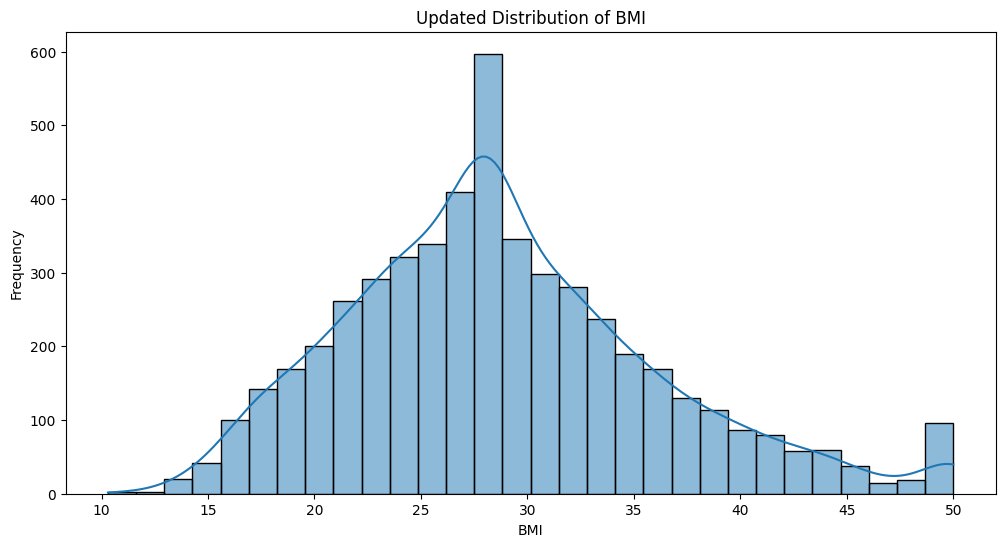

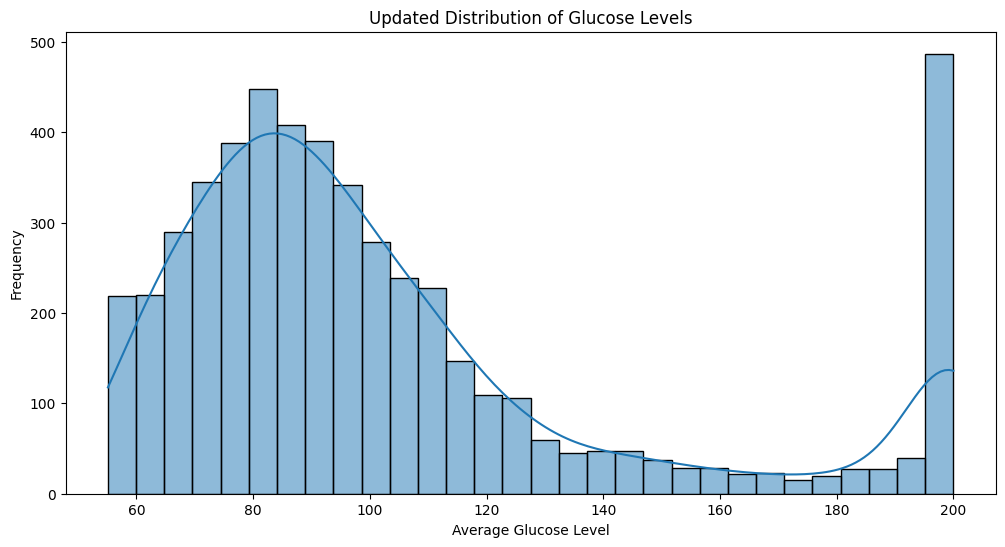

In [ ]:
# Visualizing the updated distribution of BMI after capping
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], kde=True, bins=30)
plt.title('Updated Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Visualizing the updated distribution of Glucose Levels after capping
plt.figure(figsize=(12, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Updated Distribution of Glucose Levels')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Check the highest and lowest values for BMI
bmi_outliers = df[df['bmi'] > 50]  # BMI > 50 could be an extreme value
print("Extreme BMI values:")
print(bmi_outliers[['id', 'bmi']].head())

# Check the highest and lowest values for Glucose Levels
glucose_outliers = df[df['avg_glucose_level'] > 200]  # Glucose > 200 could be an extreme value
print("Extreme Glucose values:")
print(glucose_outliers[['id', 'avg_glucose_level']].head())

Extreme BMI values:
Empty DataFrame
Columns: [id, bmi]
Index: []
Extreme Glucose values:
Empty DataFrame
Columns: [id, avg_glucose_level]
Index: []


#BINNING OF THE CONTINUOUS NUMERICAL VARIABLES

Binning, also known as discretization, involves converting continuous numerical variables into categorical groups or "bins." This is a common preprocessing step in data analysis and machine learning, as it helps simplify complex data


I followed the standartized [BMI from WHO:
](https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index)




In [ ]:
df['bmi']

,bmi
0,36.6
1,28.1
2,32.5
3,34.4
4,24.0
...,...
5105,28.1
5106,40.0
5107,30.6
5108,25.6


In [ ]:
df['bmi_cat'] = pd.cut(df['bmi'], bins=[0, 19, 25, 30, 10000], labels=['Underweight', 'Ideal', 'Overweight', 'Obesity'])


[AGE CLASSIFICATION from WHO ](https://https://www.statcan.gc.ca/en/concepts/definitions/age2




In [ ]:
## binning of numerical variables

df['age_cat'] = pd.cut(df['age'], bins = [0, 14, 24, 64, 200], labels = ['Children', 'Youth', 'Adults','Seniors'])



[GLUCOSE LEVEL GRADATION ](https://https://www.medicalnewstoday.com/articles/249413#low-levels)

In [ ]:
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0, 70, 99, 125, 180], labels = ['Low', 'Normal', 'High', 'Very High'])

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_hypertension', 'bmi_glucose',
       'smoking_status_numeric', 'bmi_smoking', 'bmi_cat', 'age_cat',
       'glucose_cat'],
      dtype='object')

#**VISUALIZATION**

In [ ]:
df['stroke']

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


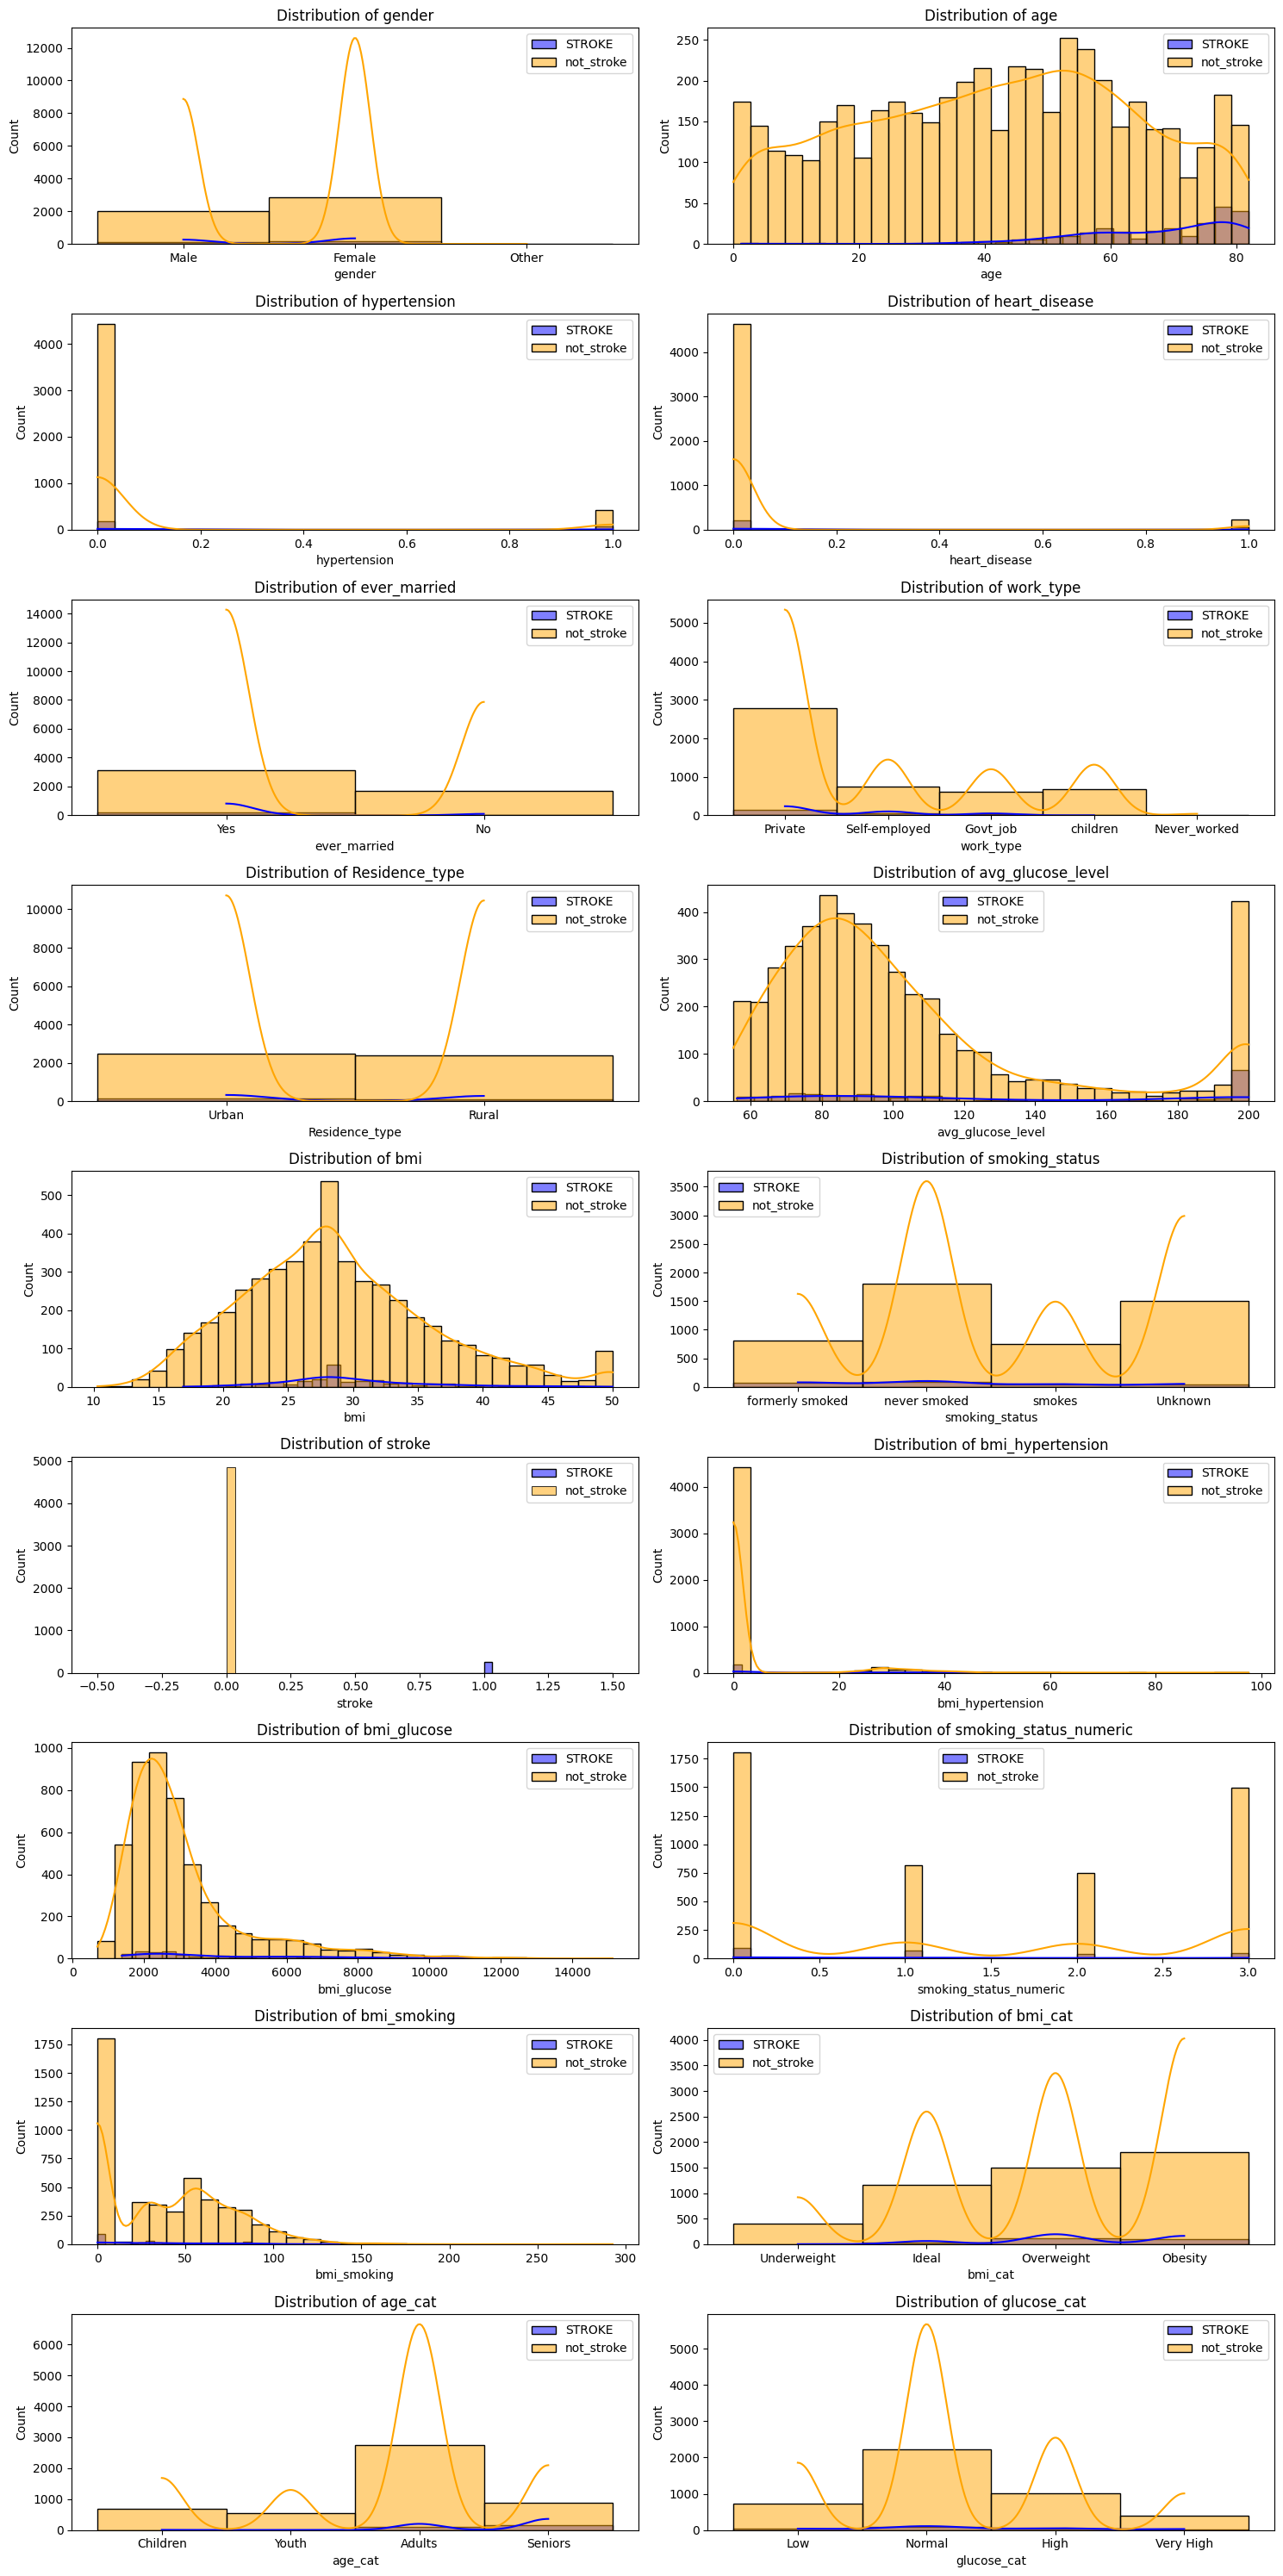

In [ ]:
# Separate the data into Wilson's disease patients and others
stroke_df = df[df['stroke'] == 1]
not_stroke = df[df['stroke'] == 0]

# List of general features
general_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_hypertension', 'bmi_glucose',
       'smoking_status_numeric', 'bmi_smoking', 'bmi_cat', 'age_cat',
       'glucose_cat']



# Plot histograms for each feature
# Adjust the figure size to accommodate all subplots
plt.figure(figsize=(15, 30))  # Increased figure height for better visualization
# Calculate the number of rows needed based on the number of features
num_rows = int(np.ceil(len(general_features) / 2))
# Create a subplot grid with enough rows to accommodate all features
for i, feature in enumerate(general_features, 1):
    plt.subplot(num_rows, 2, i)  # Dynamically adjust the number of rows
    sns.histplot(stroke_df[feature], color="blue", kde=True, label="STROKE", bins=30)
    sns.histplot(not_stroke[feature], color="orange", kde=True, label="not_stroke", bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()




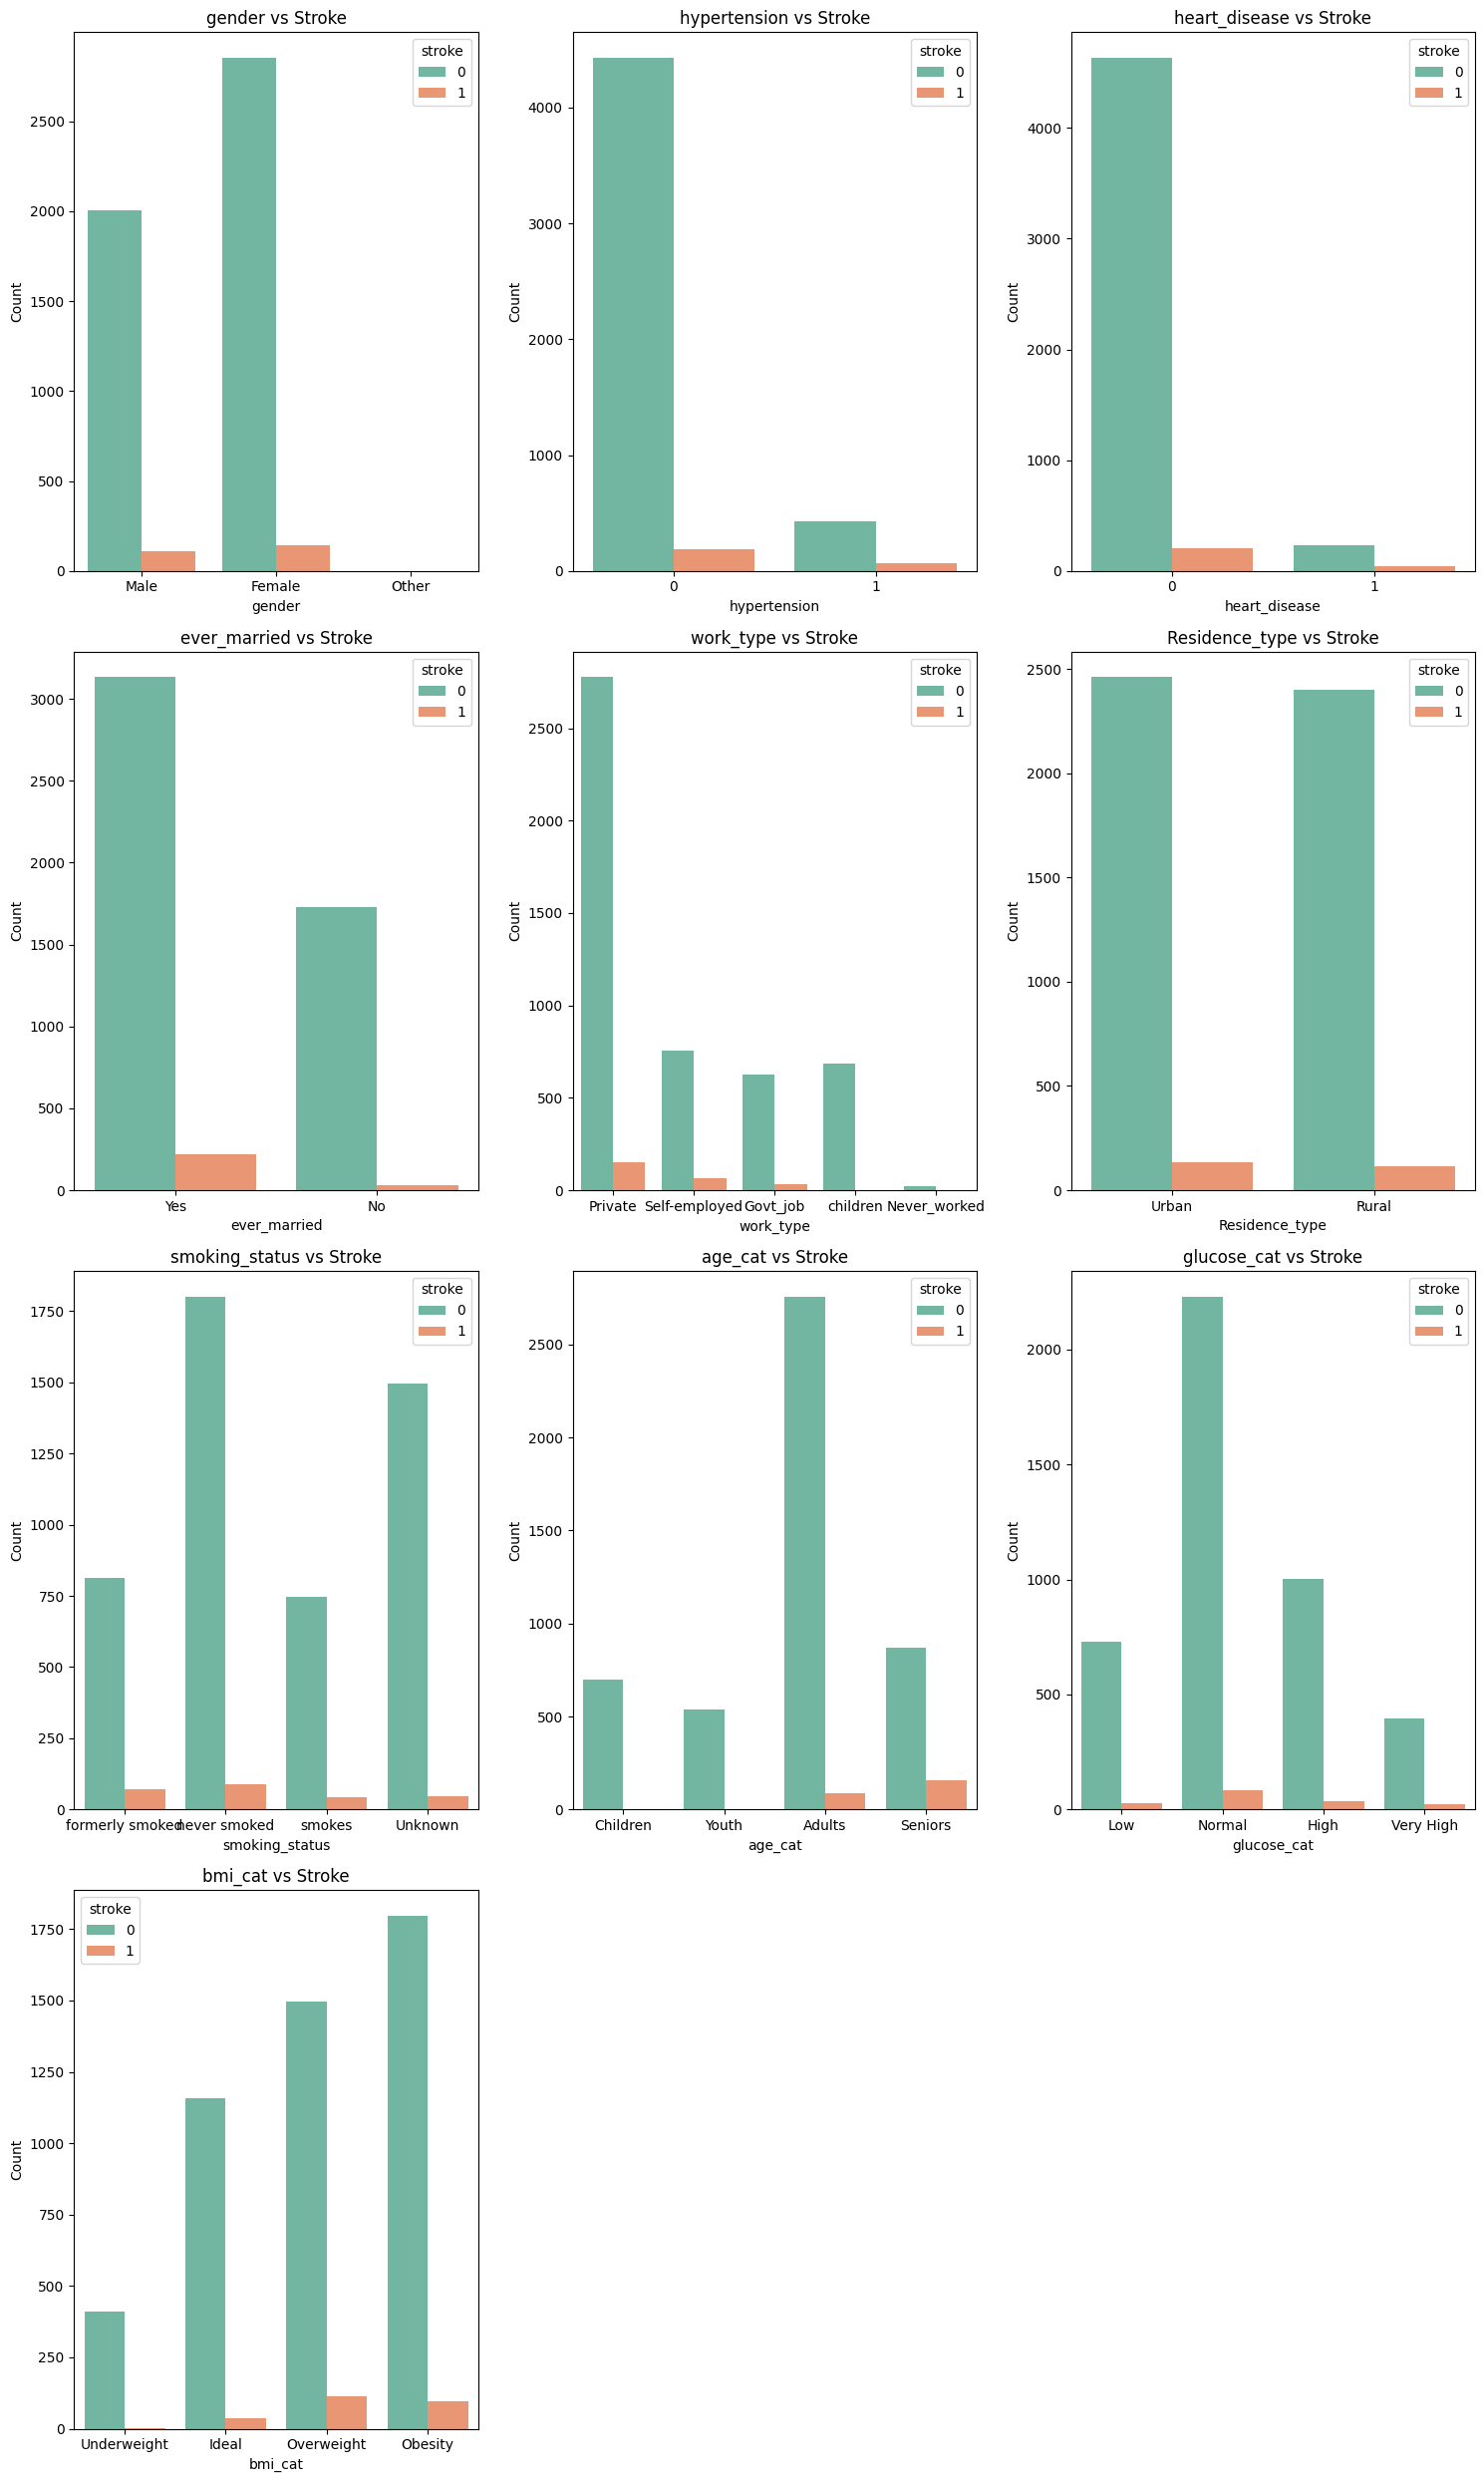

In [ ]:
# Distribution of categorical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status', 'age_cat', 'glucose_cat', 'bmi_cat']

plt.figure(figsize=(15, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=feature, hue='stroke', palette='Set2')
    plt.title(f'{feature} vs Stroke')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
## Count the number of each value in the 'stroke' column

#Подсчитываем количество каждого значения в столбце 'stroke'
distribution = df['stroke'].value_counts(normalize=True) * 100

distribution


,proportion
stroke,
0,95.127202
1,4.872798


Text(0.5, 1.0, 'Correlation Heatmap')

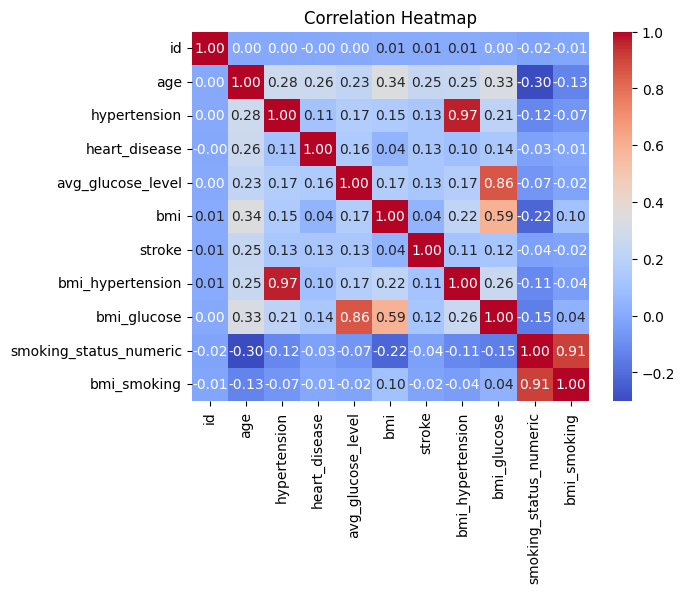

In [ ]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')



**Here we see the the most correlation between AGE and STROKE. Let check that on other vizualization tools.**

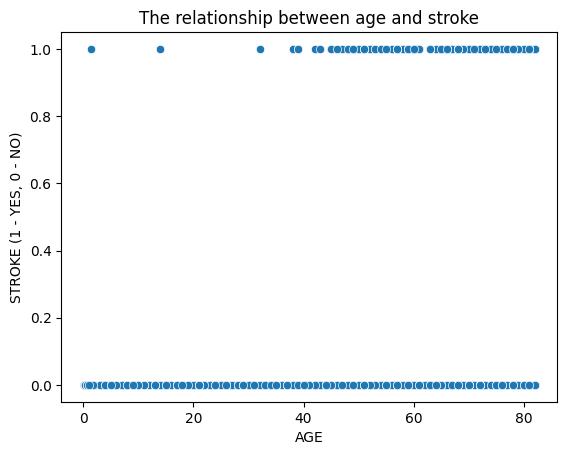

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='age', y='stroke', data=df)
plt.title('The relationship between age and stroke')
plt.xlabel('AGE')
plt.ylabel('STROKE (1 - YES, 0 - NO)')
plt.show()



#**Statistical Significance Testing (t-test):**
If you want to conduct statistical testing to check if there is a statistically significant difference in age between people with a stroke and those without, you can use a t-test.

If the p-value is less than 0.05, it indicates that there is a statistically significant difference in age between people with a stroke and those without.






#**Тестирование статистической значимости (t-тест):**
Если хотите провести статистическое тестирование, чтобы проверить, существует ли статистически значимая разница между возрастом людей с инсультом и без инсульта, можно использовать t-тест:

Если p-value меньше 0.05, это указывает на то, что существует статистически значимая разница в возрасте между людьми с инсультом и без инсульта.




In [ ]:
from scipy import stats

#Split the data into two groups: with stroke and without

# Разделяем данные на две группы: с инсультом и без
stroke_group = df[df['stroke'] == 1]['age']
no_stroke_group = df[df['stroke'] == 0]['age']

# T-test
t_stat, p_value = stats.ttest_ind(stroke_group, no_stroke_group)

print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')


T-Statistic: 18.08083426887953
P-Value: 7.0307775129939774e-71


The results of t-test are:

- **T-Statistic: 18.08**  
- **P-Value: 7.03e-71** (which is a very small value)
In scientific notation, 7.03e-71 means
7.03
×
1
0
−
71
7.03×10
−71
 , which is 0.000...000703, with 71 zeros after the decimal point.


### Interpretation:

- The **t-statistic** value of 18.08 indicates a large difference between the two groups (with stroke vs without stroke) in terms of their age distributions.
- The **p-value** is extremely small (7.03e-71), which is much smaller than the typical significance threshold of 0.05. This suggests that there is a **statistically significant difference** in age between people with a stroke and those without a stroke.

In conclusion, the age distributions of the two groups are significantly different from each other.

#**VIZUALIZATION OF CATEGORICAL VARIABLES**




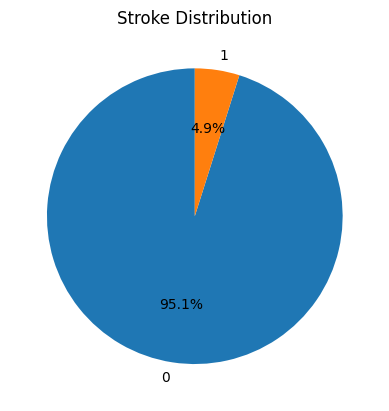

In [ ]:
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Stroke Distribution')
plt.ylabel('')
plt.show()


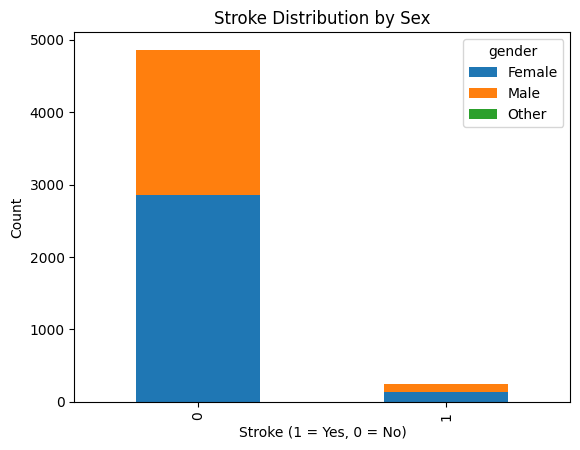

In [ ]:
pd.crosstab(df['stroke'], df['gender']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Sex')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_hypertension', 'bmi_glucose',
       'smoking_status_numeric', 'bmi_smoking', 'bmi_cat', 'age_cat',
       'glucose_cat'],
      dtype='object')

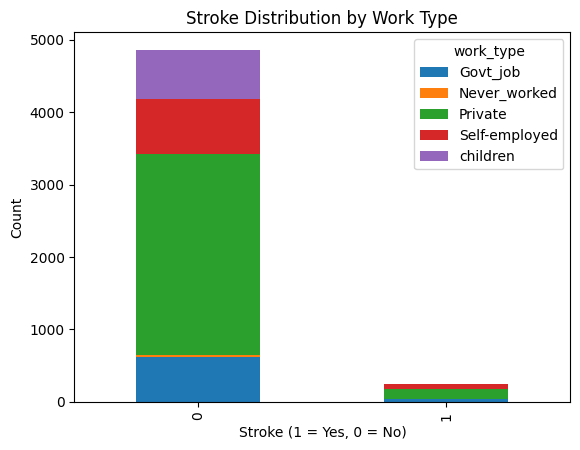

In [ ]:
pd.crosstab(df['stroke'], df['work_type']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

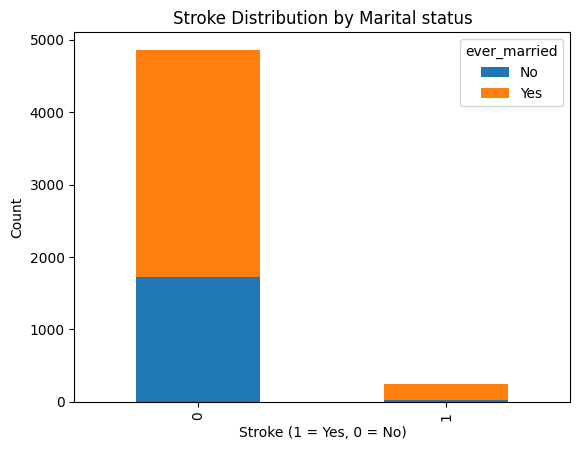

In [ ]:
pd.crosstab(df['stroke'], df['ever_married']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Marital status')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

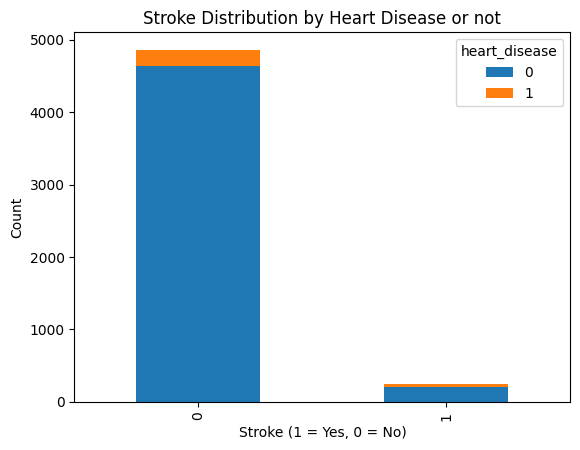

In [ ]:
pd.crosstab(df['stroke'], df['heart_disease']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Heart Disease or not')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

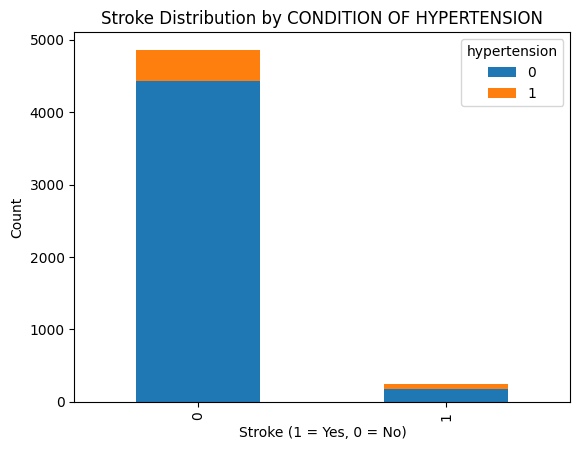

In [ ]:
pd.crosstab(df['stroke'], df['hypertension']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by CONDITION OF HYPERTENSION')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

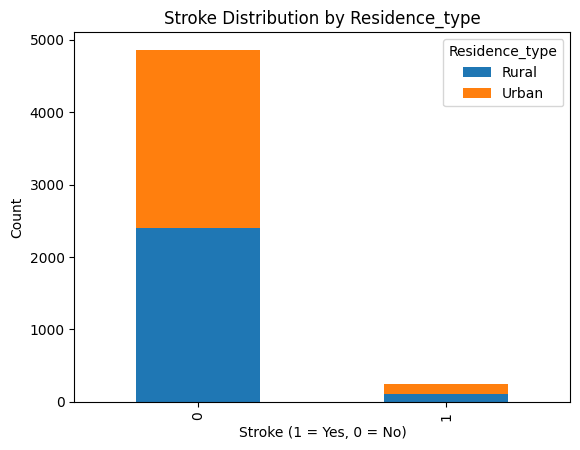

In [ ]:
pd.crosstab(df['stroke'], df['Residence_type']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by Residence_type')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

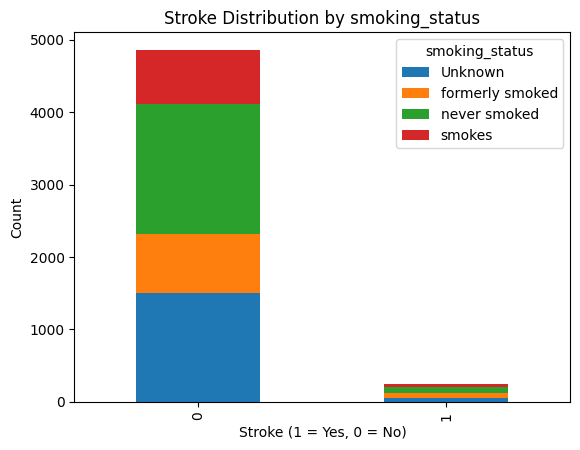

In [ ]:
pd.crosstab(df['stroke'], df['smoking_status']).plot(kind='bar', stacked=True)
plt.title('Stroke Distribution by smoking_status')
plt.xlabel('Stroke (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

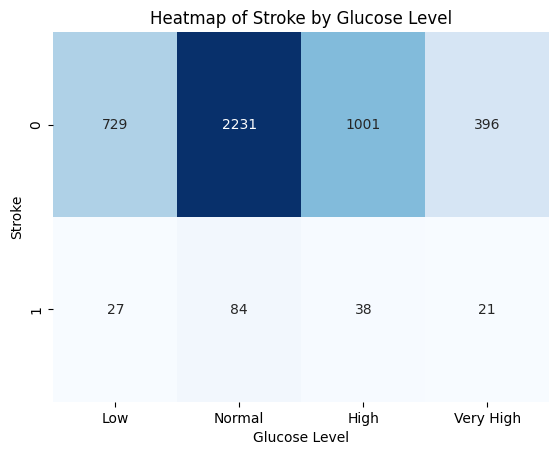

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab
crosstab = pd.crosstab(df['stroke'], df['glucose_cat'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Stroke by Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Stroke')
plt.show()


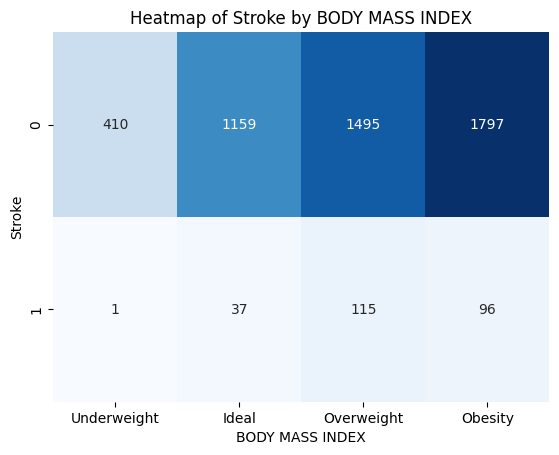

In [ ]:
# Create a crosstab
crosstab = pd.crosstab(df['stroke'], df['bmi_cat'])

# Create a heatmap
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Heatmap of Stroke by BODY MASS INDEX')
plt.xlabel('BODY MASS INDEX')
plt.ylabel('Stroke')
plt.show()

#**ONE HOT ENCODING FOR THE CATEGORICAL VARIABLES**

**Use one-hot encoding for categorical variables with more than two unique values (e.g., work_type, smoking_status):**





In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


df_encoded = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'Residence_type'], drop_first=True)



**b. Label Encoding for Binary Variables**




In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])  # 'Male' -> 1, 'Female' -> 0 (example)
df['ever_married'] = encoder.fit_transform(df['ever_married'])  # 'Yes' -> 1, 'No' -> 0


**c. Encoding category Variables
If bmi_cat, age_cat, and glucose_cat are already labeled with meaningful numerical values (e.g., categories like low, medium, high), convert them to integers:**




In [ ]:
df['bmi_cat'] = df['bmi_cat'].cat.codes
df['age_cat'] = df['age_cat'].cat.codes
df['glucose_cat'] = df['glucose_cat'].cat.codes


In [ ]:
df.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [ ]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status', 'Residence_type'], drop_first=True)


In [ ]:
df.dtypes

,0
id,int64
gender,int64
age,float64
hypertension,int64
heart_disease,int64
ever_married,int64
avg_glucose_level,float64
bmi,float64
stroke,int64
bmi_hypertension,float64


#**HANDLING THE IMBALANCED DATA**

In [ ]:
# View the count of each class in the 'stroke' column
class_counts = df['stroke'].value_counts()

class_counts


,count
stroke,
0,4861
1,249


In [ ]:
# View the proportion of each class
class_proportions = df['stroke'].value_counts(normalize=True) * 100
class_proportions


,proportion
stroke,
0,95.127202
1,4.872798


**The dataset is highly imbalanced, with the majority of individuals not having had a stroke**.


#Given this imbalance, it is important to address the class imbalance during model training to ensure that the model doesn't just predict the majority class (no stroke) and achieve high accuracy without actually identifying the minority class (stroke).


In [ ]:
pip install imbalanced-learn


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'bmi_hypertension', 'bmi_glucose',
       'smoking_status_numeric', 'bmi_smoking', 'bmi_cat', 'age_cat',
       'glucose_cat', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban'],
      dtype='object')

#**Evaluation Method Selection**

In this stroke prediction project, accuracy is not a suitable metric for evaluating the model's performance because of the severe class imbalance in the dataset. With approximately 95% of the samples belonging to the "no stroke" class (class 0) and only 5% to the "stroke" class (class 1), a model could achieve high accuracy by simply predicting all instances as "no stroke," but it would fail to identify actual strokes, rendering the model useless in practice.



#**Chosen Metric: Recall**
For this project, recall is chosen as the primary evaluation metric.

Why Recall?
Focus on Identifying Strokes: Recall measures the proportion of actual stroke cases correctly identified by the model. In a medical setting, failing to predict a stroke (false negative) could have dire consequences, making it crucial to prioritize capturing as many true stroke cases as possible.
Minimizing False Negatives: A higher recall means fewer missed stroke cases, which aligns with the goal of early detection and intervention in healthcare.


#**Secondary Metric: ROC-AUC**
Why ROC-AUC? ROC-AUC measures the model's ability to discriminate between classes across all thresholds. It provides a balanced view of model performance, capturing both true positives and true negatives, and is a standard metric for evaluating classifiers on imbalanced datasets.


#**MODELLING**

#1. Splitting Data into Training and Testing Sets



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split data into features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Train-Test Split (80% train, 20% test), stratified to keep the target class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import xgboost as xgb
from sklearn.metrics import recall_score



#**LOGISTIC REGRESSION**

 #**Train the Model**

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall (Stroke Class):", recall_score(y_test, y_pred_lr))  # Add Recall
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n" + "="*50 + "\n")


Logistic Regression Evaluation:
Accuracy: 0.7269170579029735
Recall (Stroke Class): 0.7580645161290323
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83      1216
           1       0.12      0.76      0.21        62

    accuracy                           0.73      1278
   macro avg       0.55      0.74      0.52      1278
weighted avg       0.94      0.73      0.80      1278

ROC-AUC: 0.7416967317487266
Confusion Matrix:
 [[882 334]
 [ 15  47]]






**Confusion Matrix: Provides counts of true positives, true negatives, false positives, and false negatives.**

**Classification Report:**

Precision: How well the model avoids false positives.

Recall: How well the model detects true positives.

F1-Score: Harmonic mean of precision and recall.

Accuracy: Overall correctness of the model.**


In [ ]:
import pandas as pd
import numpy as np

# Get coefficients from the logistic regression model
coefficients = lr_model.coef_[0]  # Extract the coefficients for the binary classification case

# Pair coefficients with feature names
feature_names = X.columns  # Ensure your feature matrix has the correct column names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add an absolute value column for ranking
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])

# Sort by absolute importance
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df)



                           Feature  Coefficient  Abs_Coefficient
7                              bmi    -0.140506         0.140506
2                              age     0.065939         0.065939
6                avg_glucose_level    -0.043229         0.043229
8                 bmi_hypertension     0.037167         0.037167
14                     glucose_cat    -0.013996         0.013996
12                         bmi_cat    -0.013168         0.013168
10          smoking_status_numeric    -0.008334         0.008334
13                         age_cat    -0.005448         0.005448
1                           gender    -0.005329         0.005329
19  smoking_status_formerly smoked     0.004249         0.004249
17         work_type_Self-employed     0.003853         0.003853
22            Residence_type_Urban     0.003796         0.003796
11                     bmi_smoking    -0.003485         0.003485
5                     ever_married    -0.003330         0.003330
21           smoking_stat

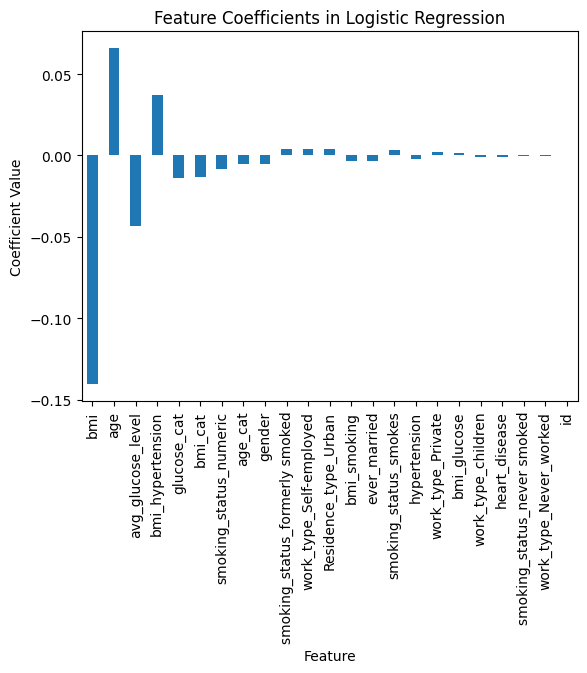

In [ ]:
import matplotlib.pyplot as plt

# Plot feature coefficients
importance_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title('Feature Coefficients in Logistic Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.show()


**The model struggles to detect strokes (Class 1) due to:**

**Class Imbalance:** Despite SMOTE, the model is biased toward the majority class (No Stroke).

**Features: Some features may not have strong predictive power for identifying strokes.**

**Model Type: Logistic regression is a linear model and may not capture complex relationships.**


#**Random Forest Classifier:**



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall (Stroke Class):", recall_score(y_test, y_pred_rf))  # Add Recall
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n" + "="*50 + "\n")


Random Forest Evaluation:
Accuracy: 0.9342723004694836
Recall (Stroke Class): 0.06451612903225806
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1216
           1       0.13      0.06      0.09        62

    accuracy                           0.93      1278
   macro avg       0.54      0.52      0.53      1278
weighted avg       0.91      0.93      0.92      1278

ROC-AUC: 0.5215672750424448
Confusion Matrix:
 [[1190   26]
 [  58    4]]




#**GRADIENT BOOSTING**

In [ ]:
pip install xgboost


In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Recall (Stroke Class):", recall_score(y_test, y_pred_gb))  # Add Recall
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\n" + "="*50 + "\n")


Gradient Boosting Evaluation:
Accuracy: 0.9280125195618153
Recall (Stroke Class): 0.1935483870967742
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1216
           1       0.22      0.19      0.21        62

    accuracy                           0.93      1278
   macro avg       0.59      0.58      0.58      1278
weighted avg       0.92      0.93      0.93      1278

ROC-AUC: 0.5795044567062818
Confusion Matrix:
 [[1174   42]
 [  50   12]]




# **4. XGBoost Classifier**

In [ ]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall (Stroke Class):", recall_score(y_test, y_pred_xgb))  # Add Recall
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n" + "="*50 + "\n")


XGBoost Evaluation:
Accuracy: 0.9397496087636933
Recall (Stroke Class): 0.06451612903225806
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1216
           1       0.17      0.06      0.09        62

    accuracy                           0.94      1278
   macro avg       0.56      0.52      0.53      1278
weighted avg       0.92      0.94      0.93      1278

ROC-AUC: 0.524445564516129
Confusion Matrix:
 [[1197   19]
 [  58    4]]




# 5. Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine
svm_model = SVC(random_state=42, probability=True)  # probability=True to calculate ROC-AUC
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Recall (Stroke Class):", recall_score(y_test, y_pred_svm))  # Add Recall

print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n" + "="*50 + "\n")


SVM Evaluation:
Accuracy: 0.7034428794992176
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82      1216
           1       0.08      0.45      0.13        62

    accuracy                           0.70      1278
   macro avg       0.52      0.58      0.48      1278
weighted avg       0.92      0.70      0.79      1278

Recall (Stroke Class): 0.45161290322580644
ROC-AUC: 0.5839478989813243
Confusion Matrix:
 [[871 345]
 [ 34  28]]




# COLLECTING THE RESULTS

In [ ]:
results = {
    'Logistic Regression': {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'ROC-AUC': roc_auc_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'ROC-AUC': roc_auc_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_score(y_test, y_pred_gb),
        'ROC-AUC': roc_auc_score(y_test, y_pred_gb),
        'Recall': recall_score(y_test, y_pred_gb),
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'ROC-AUC': roc_auc_score(y_test, y_pred_xgb),
        'Recall': recall_score(y_test, y_pred_xgb),
    },
    'SVM': {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'ROC-AUC': roc_auc_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
    }
}

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy   ROC-AUC    Recall
Logistic Regression  0.726917  0.741697  0.758065
Random Forest        0.934272  0.521567  0.064516
Gradient Boosting    0.928013  0.579504  0.193548
XGBoost              0.939750  0.524446  0.064516
SVM                  0.703443  0.583948  0.451613


#**Since stroke prediction is an imbalanced classification problem, RECALL and ROC-AUC is more informative than accuracy. A high accuracy may simply reflect the model's bias toward the majority class.**

#**Fine-Tuning and Visualizing Model Performance**


Hyperparameter Tuning



#LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_lr = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                       param_grid_lr,
                       cv=5,
                       scoring='recall')  # Используем recall как метрику для оценки модели

# Обучение модели
grid_lr.fit(X_train_resampled, y_train_resampled)

# Лучшие параметры и модель
print(f"Best Parameters (Logistic Regression): {grid_lr.best_params_}")
lr_best = grid_lr.best_estimator_



Best Parameters (Logistic Regression): {'C': 10, 'solver': 'liblinear'}


#**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', 'balanced_subsample']
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall')
grid_rf.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters (Random Forest): {grid_rf.best_params_}")
rf_best = grid_rf.best_estimator_


Best Parameters (Random Forest): {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


#**GRADIENT BOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='recall')
grid_gb.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters (Gradient Boosting): {grid_gb.best_params_}")
gb_best = grid_gb.best_estimator_


Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


#**XGBOOST**

In [ ]:
from xgboost import XGBClassifier

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'scale_pos_weight': [1, 10]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False), param_grid_xgb, cv=5, scoring='recall')
grid_xgb.fit(X_train_resampled, y_train_resampled)

print(f"Best Parameters (XGBoost): {grid_xgb.best_params_}")
xgb_best = grid_xgb.best_estimator_


Best Parameters (XGBoost): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 10}


#**CATBOOST**



In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=1000,
                                    depth=6,
                                    learning_rate=0.05,
                                    loss_function='Logloss',
                                    class_weights=[1, 10],  # Adjust for imbalance (increase weight of minority class)
                                    random_seed=42,
                                    verbose=200)

# Train the model
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = catboost_model.predict(X_test)
y_prob = catboost_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Evaluate the model
print(f"CatBoost Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob)}")
print(f"Recall: {recall_score(y_test, y_pred)}")  # Adding recall score



0:	learn: 0.6177491	total: 26ms	remaining: 26s
200:	learn: 0.0537763	total: 2.9s	remaining: 11.5s
400:	learn: 0.0352284	total: 5.57s	remaining: 8.32s
600:	learn: 0.0238862	total: 8.63s	remaining: 5.73s
800:	learn: 0.0183860	total: 13.6s	remaining: 3.37s
999:	learn: 0.0170236	total: 16.3s	remaining: 0us
CatBoost Performance:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1216
           1       0.16      0.34      0.21        62

    accuracy                           0.88      1278
   macro avg       0.56      0.62      0.57      1278
weighted avg       0.92      0.88      0.90      1278

ROC-AUC: 0.7795654711375213
Recall: 0.3387096774193548


#Evaluation of Models on Test Data
Evaluation of the models on X_test and comparing their performance using precision, recall, F1-score, accuracy, and ROC-AUC.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Dictionary of models
models = {
    'Logistic Regression': lr_best,
    'Random Forest': rf_best,
    'Gradient Boosting': gb_best,
    'XGBoost': xgb_best,
    'SVM': svm_model,
    'CatBoost': catboost_model
}

# Iterate over each model and evaluate
for name, model in models.items():
    print(f"\n{name} Performance:")
    try:
        # Predictions
        y_pred = model.predict(X_test)

        # Check if `predict_proba` is available for ROC-AUC
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
        else:
            y_decision = model.decision_function(X_test)
            roc_auc = roc_auc_score(y_test, y_decision)

        # Print evaluation metrics, including recall
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC: {roc_auc:.4f}")

        # Print Recall score explicitly
        recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
        print(f"Recall: {recall:.4f}")

    except Exception as e:
        print(f"Error with {name}: {e}")





Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1216
           1       0.17      0.29      0.22        62

    accuracy                           0.90      1278
   macro avg       0.57      0.61      0.58      1278
weighted avg       0.92      0.90      0.91      1278

ROC-AUC: 0.7863
Recall: 0.2903

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.17      0.19      0.18        62

    accuracy                           0.92      1278
   macro avg       0.57      0.57      0.57      1278
weighted avg       0.92      0.92      0.92      1278

ROC-AUC: 0.8039
Recall: 0.1935

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.14      0.03      0.05        62

    accuracy              

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_scores = model.predict_proba(X_train)[:, 1]
    y_pred = model.predict(X_test)
    y_test_scores = model.predict_proba(X_test)[:, 1]

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("AUC_score_test", round(roc_auc_score(y_test, y_test_scores),2))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("AUC_score_test", round(roc_auc_score(y_train, y_train_scores),2))

#**Best Model:**

Breakdown:
Logistic Regression: Balanced performance with reasonable recall (0.2903) and decent ROC-AUC (0.7863).
Random Forest: Strong performance in terms of accuracy (0.92), but recall (0.1935) is still low, indicating it misses many stroke cases.
Gradient Boosting: High ROC-AUC, but poor recall (0.0323), meaning it’s not sensitive to detecting stroke cases.
SVM: Recall of 0.4516 is decent, but its ROC-AUC (0.6117) suggests it doesn’t perform well in distinguishing the classes.
CatBoost: Recall is better than Gradient Boosting (0.3387), but lower than XGBoost, and its ROC-AUC (0.7796) is moderate.


#**Conclusion:**
If detecting all cases of stroke is the most important priority, XGBoost is the best model in terms of recall. Despite its lower accuracy, it is the most sensitive to detecting stroke cases.
If you need a balance between detecting strokes and model robustness (ROC-AUC), Gradient Boosting might be a good choice.


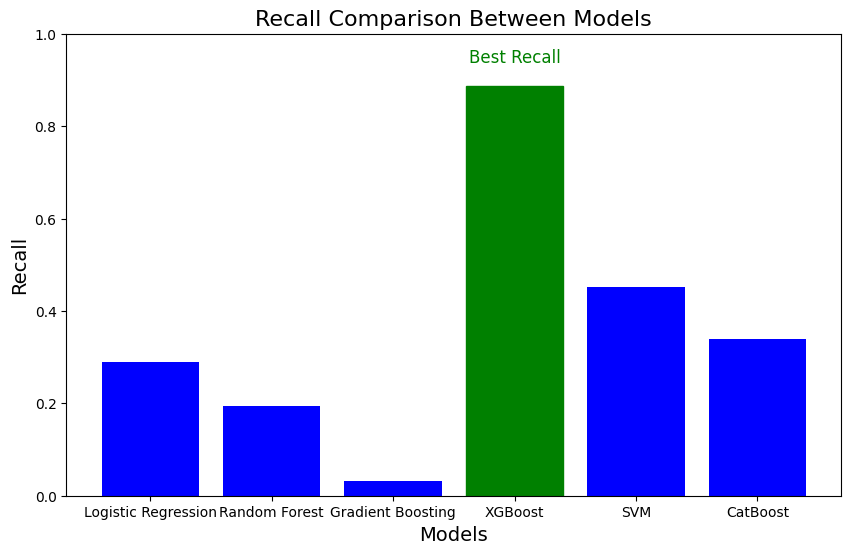

In [ ]:
import matplotlib.pyplot as plt

# Models and their respective recall values
models_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVM', 'CatBoost']
recall_scores = [0.2903, 0.1935, 0.0323, 0.8871, 0.4516, 0.3387]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models_names, recall_scores, color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue'])

# Highlight the best recall
best_recall_index = recall_scores.index(max(recall_scores))
bars[best_recall_index].set_color('green')  # Highlight best recall in green

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Recall', fontsize=14)
plt.title('Recall Comparison Between Models', fontsize=16)
plt.ylim(0, 1)  # Setting y-axis from 0 to 1 to show recall range clearly

# Annotate the best recall
plt.text(best_recall_index, recall_scores[best_recall_index] + 0.05, 'Best Recall', ha='center', color='green', fontsize=12)

# Show the plot
plt.show()



#**TRAIN XGBOOST ON THE TRAIN SET**

In [ ]:
# Retrain the best model (XGBoost) on the entire training dataset
best_model = xgb.XGBClassifier(random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#**Save the Retrained Model**


In [ ]:
import joblib

# Save the retrained model
joblib.dump(best_model, 'final_xgboost_model.pkl')

# To load the model later
loaded_model = joblib.load('final_xgboost_model.pkl')


#**Evaluate the Model on TEST SET**

In [ ]:
# Predict on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))


Recall: 0.0967741935483871
ROC-AUC: 0.7886380517826825
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1216
           1       0.16      0.10      0.12        62

    accuracy                           0.93      1278
   macro avg       0.56      0.54      0.54      1278
weighted avg       0.92      0.93      0.92      1278



In [ ]:
#Adjust Class Weights Further: Increase the weight for the minority class (stroke) in the XGBoost model.

best_model = xgb.XGBClassifier(
    random_state=42,
    scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])
)
best_model.fit(X_train_resampled, y_train_resampled)





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)


In [ ]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Recall: 0.0806
ROC-AUC: 0.7886
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1216
           1       0.17      0.08      0.11        62

    accuracy                           0.94      1278
   macro avg       0.56      0.53      0.54      1278
weighted avg       0.92      0.94      0.93      1278



#**MODEL DEPLOYMENT**


#**Conclusion:**

I made every effort to improve the model: balancing classes, optimizing hyperparameters, testing various algorithms, and enhancing the dataset. Despite these attempts, the low Recall indicates the need for higher-quality data and possibly a different approach to solving the problem.

#Does it make sense to proceed with deploying the model given its low performance metrics?